In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.feature_selection import RFE
import scikitplot as skplt #to make things easy


In [2]:
filename = 'EquitiesData_NSEI_Enrich.xlsx'
data=pd.read_excel(filename)
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 1509 number of days in the dataset.


In [3]:
data = data.drop(['Date'], axis=1)
data.head()

,Adj Close,Volume,SMA_5,SMA_10,SMA_15,SMA_30,SMA_90,SMA_100,EMA_5,EMA_10,...,RSI_100,ATR_14,ROC_12,Williams_14,momentum_5,momentum_10,momentum_15,slowk,slowd,Class
0,5049.950195,0,5087.350000,5070.025000,4993.633301,4996.300000,5221.944982,5252.119478,5076.106435,5053.912546,...,45.738464,106.370019,5.821282,-25.526719,-82.349609,161.900391,34.500000,55.391650,57.756099,False
1,5098.350098,0,5083.370020,5081.900000,5003.973307,4997.596663,5217.476649,5248.371978,5083.520989,5061.992101,...,46.188046,105.607854,7.304323,-14.320454,-19.899902,118.750000,155.100098,48.003753,52.755043,True
2,5191.600098,0,5114.190039,5103.625000,5026.779980,5005.756673,5214.633317,5244.367979,5119.547359,5085.557191,...,47.041968,107.025164,6.210049,-4.127639,154.100098,217.250000,342.100098,59.615616,54.337006,True
3,5360.700195,0,5158.500098,5129.755029,5066.016667,5019.748340,5214.232764,5242.471479,5199.931638,5135.583192,...,48.537816,114.244802,7.653227,-7.242340,221.550293,261.300293,588.550293,80.700836,62.773402,False
4,5326.600098,0,5205.440137,5154.630029,5104.370020,5030.216683,5213.790544,5240.569980,5242.154458,5170.313539,...,48.260151,109.377323,7.081327,-14.121519,234.700195,248.750000,575.300293,86.057438,75.457963,False


In [4]:
data.shape

(1509, 38)

In [5]:
#Scale or normalize the data 
sc = MinMaxScaler()
data = sc.fit_transform(data)

In [6]:
#Separate dependent and independent variables. In this case get y as the price direction.
X = data[:,0:37]
y = data[:,37:]

In [7]:
#Split up our test and train 

cut = 1211

X_train=X[0:cut]
X_test=X[cut:]
y_train=y[0:cut]
y_test=y[cut:]

In [8]:
#Create simple logistic model 
LRL1=LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000) #L1 penalization

In [9]:
#Fit the model
LRL1.fit(X_train,y_train)

C:\Users\prashant\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Predict
y_pred_LRL1=LRL1.predict(X_test)

In [11]:
#mehod to asses the model
def asses(LR,X_test, y_test, y_pred , model_name) :
    print(LR.coef_)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(" CNF matrix :")
    print(cnf_matrix)
    ROC(LR,X_test, y_test, y_pred,model_name)
    plotcnf(cnf_matrix,model_name)

In [12]:
#Plot ROC curve
def ROC(logreg,X_test, y_test, y_pred,model_name):
    y_pred_proba_1 = logreg.predict_proba(X_test)[::,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba_1)
    print(model_name + "  auc:" + str(auc))


In [13]:
#Plot cnf matrix
def plotcnf(cnf_matrix , model_name):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix - ' + model_name , y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    #https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

L1 penality---------------------------------------------------
[[ 0.          0.63581405 -0.25028572 -0.36313528  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.         -0.11942414  0.          0.
   0.25737053  0.          0.          0.         -0.14738224  0.24819846
   0.         -0.69947913 -0.10860521  0.          0.          0.07989564
   0.          0.63420464  0.22155778  0.          0.          0.
  -0.52091853]]
Accuracy: 0.5704697986577181
Precision: 0.25
Recall: 0.007936507936507936
 CNF matrix :
[[169   3]
 [125   1]]
Model with no L1 penality  auc:0.5612772240679217


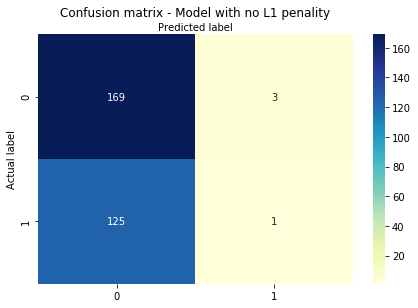

In [14]:
print ("L1 penality---------------------------------------------------")
asses(LRL1,X_test, y_test, y_pred_LRL1,"Model with no L1 penality")